In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


#stopword and tokenize functions
import nltk
from nltk import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS

#validation functions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix

sns.set_palette("Paired")

In [2]:
#import data and inspect dataset
df = pd.read_csv(os.path.join("../data", "judge_1377884607_tweet_product_company.csv"))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 3 columns):
tweet_text                                            8720 non-null object
emotion_in_tweet_is_directed_at                       3169 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    8721 non-null object
dtypes: object(3)
memory usage: 204.5+ KB


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
#checking for any missing values
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5552
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [4]:
#Dealing with long column names
df.columns = [c.replace('tweet_text', 'tweets') for c in df.columns]
df.columns = [c.replace('is_there_an_emotion_directed_at_a_brand_or_product', 'emotions') for c in df.columns]
df.columns = [c.replace('emotion_in_tweet_is_directed_at', 'devices') for c in df.columns]

In [5]:
#see how many categories are there in the column
print(df["emotions"].unique())

['Negative emotion' 'Positive emotion'
 'No emotion toward brand or product' "I can't tell"]


In [6]:
#find if it is an actual missing value
df.loc[df['tweets'].isna()]

,tweets,devices,emotions
6,NaN,NaN,No emotion toward brand or product


In [7]:
#droping missing value
df.drop([6], axis=0, inplace=True)
#print([df.head(10)])

In [8]:
#making sure it was dropped properly
df.isna().sum()

tweets         0
devices     5551
emotions       0
dtype: int64

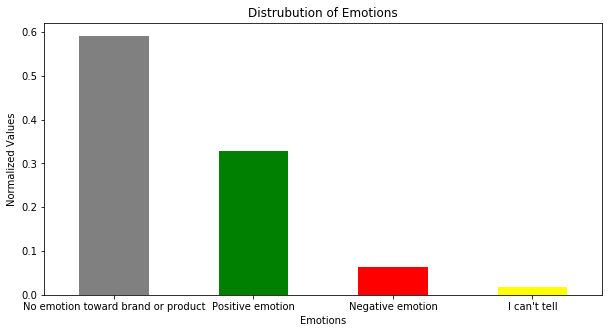

In [9]:
#Distribution of 'area_code' visualization
color = ['grey', 'green', 'red', 'yellow']
df["emotions"].value_counts(normalize=True).plot(kind='bar', rot=0, figsize=(10,5), color=color)

plt.title('Distrubution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Normalized Values')
plt.show()

In [10]:
#replacing categories to 'neutral emotion'
df['emotions'] = df['emotions'].replace('No emotion toward brand or product', 'Neutral')
df['emotions'] = df['emotions'].replace("I can't tell", "Neutral")

In [11]:
df["emotions"].value_counts()

Neutral             5306
Positive emotion    2869
Negative emotion     545
Name: emotions, dtype: int64

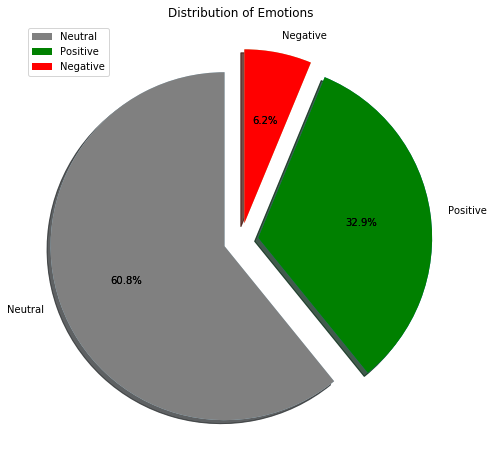

In [12]:
#creating pie chart for better visualization
labels = 'Neutral', 'Positive', 'Negative'
sizes = df["emotions"].value_counts(normalize=True)#normalize for %
 
fig1, ax1 = plt.subplots(figsize=(10,8))

#explode to have some gaps between pies and assign colors
explode = (0.1, 0.1, 0.1) 
color = ['grey','green','red']

ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(sizes, colors=color, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%')
 
plt.legend(patches, labels, loc="upper left")
plt.title("Distribution of Emotions")
plt.show()

In [13]:
#creating new dataset by droping 'Neutral emotion' 
df1 = df.drop(df[df['emotions'].str.contains('Neutral emotion')].index.tolist())

In [14]:
#checking if it worked
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8720 entries, 0 to 8720
Data columns (total 3 columns):
tweets      8720 non-null object
devices     3169 non-null object
emotions    8720 non-null object
dtypes: object(3)
memory usage: 272.5+ KB


In [15]:
#checking the percentile of emotions
df1["emotions"].value_counts(normalize=True)

Neutral            0.60849
Positive emotion   0.32901
Negative emotion   0.06250
Name: emotions, dtype: float64